In [4]:
import os
import h5py
import numpy as np

from scipy.ndimage import zoom
import matplotlib.pyplot as plt

In [60]:
#os.chdir('/home/snow/Coding/Granular-Compression')
os.chdir(r'C:\Users\Lab User\Desktop\temp1\Granular-Compression')
filePath = r"Data/Scan_17.hdf5"
dataPath = r'/RawData/Scan_17'

# Import data
with h5py.File(filePath,'r') as f: 
    data = f[dataPath][()] # (slices, rows, width)

# Choose correct coordinates & crop
data = np.transpose(data,[1,2,0]) # (rows, width, slices)
#croppedData = data[150:1100,50:970,:]
croppedData = data[200:2448][200:2048][200:2184]

(np.float64(-0.5), np.float64(2183.5), np.float64(2047.5), np.float64(-0.5))

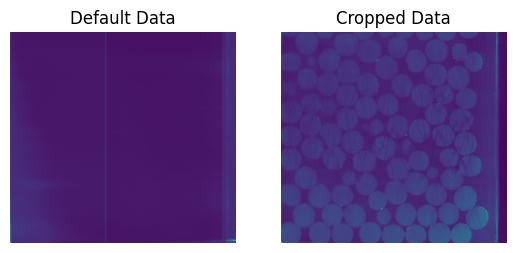

In [ ]:
# Plot raw and cropped data
plt.subplot(1,2,1)
plt.title("Default Data")
plt.imshow(data[:][:][0])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Cropped Data")
plt.imshow(croppedData[:][:][0])
plt.axis('off')

In [ ]:
rescaleData = zoom(croppedData, 0.25)

In [79]:
# Rescale and save
flatData = np.concatenate([np.ravel(slice_) for slice_ in rescaleData])
with h5py.File('downscale_17.hdf5', 'w') as f: 
    f.create_dataset("default", data=flatData)
    f.attrs["shape"] = rescaleData.shape

In [84]:
filePath = r"Data/downscale_17.hdf5"
dataPath = r'default'

with h5py.File(filePath,'r') as f: 
    print(f.keys())
    data = f[dataPath][()] # (slices, rows, width)
    rescaleData = data.reshape(f.attrs["shape"])

<KeysViewHDF5 ['default']>


(412, 512, 546)


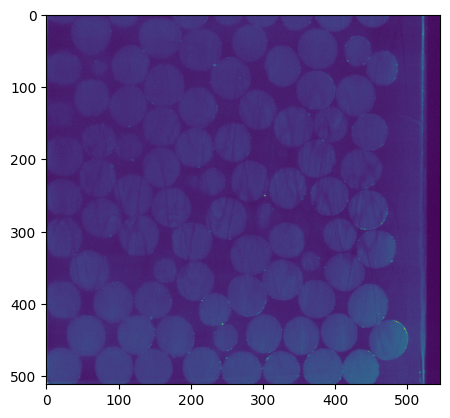

In [87]:
print(rescaleData.shape)
plt.imshow(rescaleData[:][:][0])